#### Импорты

In [1]:
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from src.data_processing import RegionProcessor, BalanceCalculator
from src.data_loading import DataLoader
from src.containers import Region
from src.tools import Mode

#### Настройки

In [2]:
DATA_PATH = "../CO_flow_2022.nc"
TARGET_VARIABLE_NAME = "20220601_mean"

START_DAY = datetime(year=2022, month=7, day=10)
END_DAY = datetime(year=2022, month=8, day=9)

REGION = Region(
    up = 65,
    down = 55,
    left = 130,
    right = 140,
)

#### Рассчитываем баланс

In [3]:
# извлекаем необходимые данные
data = DataLoader(DATA_PATH, TARGET_VARIABLE_NAME)
data.setDateRange(START_DAY, END_DAY)

daterange = data.getDateRange()
grid = data.getGrid()


# обрабатываем регион
processor = RegionProcessor(REGION, grid)
regdata = processor.getRegionData()


# считаем баланс
bal_calculator = BalanceCalculator(regdata, data, daterange)
balance_df = bal_calculator.getBalanceSeries(Mode.DF)

#### Визуализация баланса

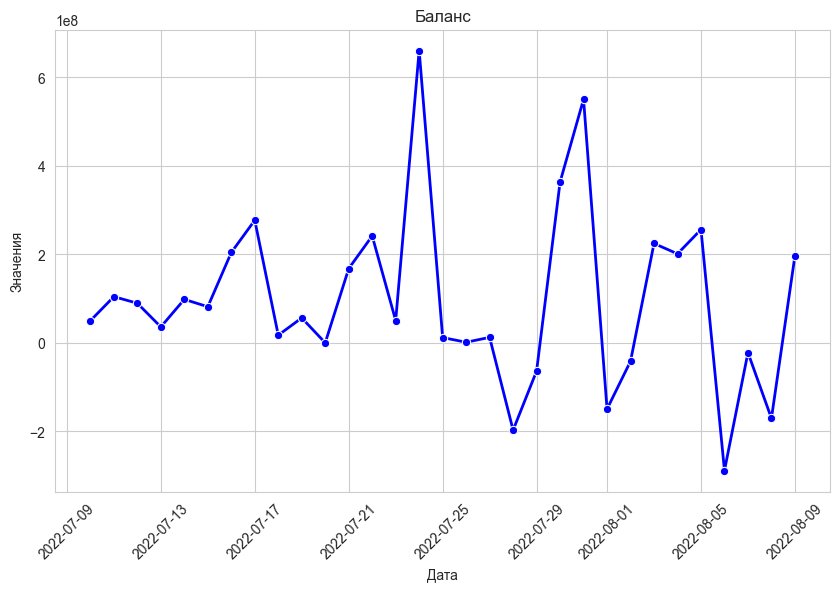

In [4]:
# Устанавливаем стиль seaborn
sns.set_style("whitegrid")

# Построение графика временного ряда с помощью seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='balance', data=balance_df, marker='o', color='b', linewidth=2)
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.title('Баланс')

# Поворот подписей оси X на 45 градусов
plt.xticks(rotation=45)

plt.show()